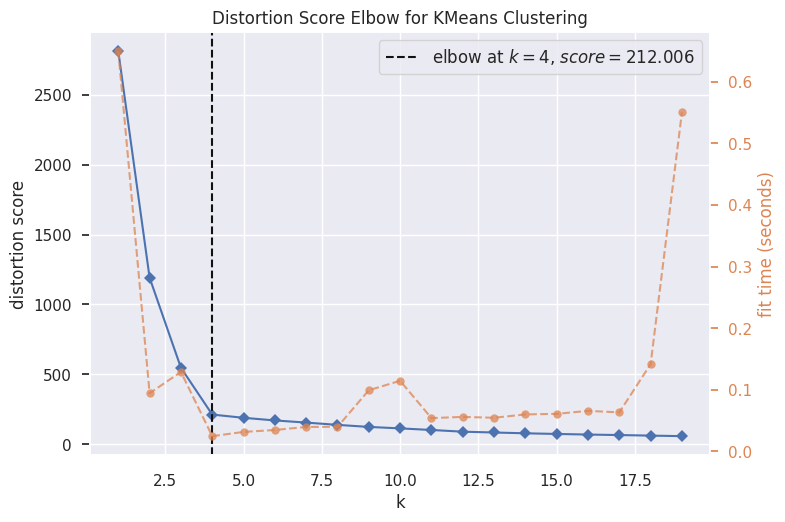

Best K: 4
accuracy: 1.0


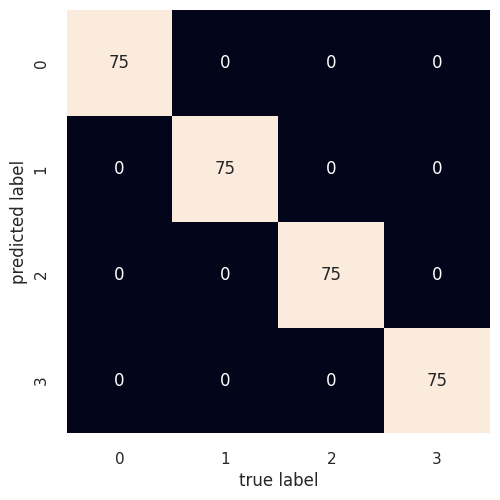

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns; sns.set()
import warnings 
warnings.filterwarnings('ignore')

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# TODO determine the best k for k-means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)
visualizer.show()

best_k = visualizer.elbow_value_
print(f"Best K: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=0)
y_means=kmeans.fit_predict(X)

labels = np.zeros_like(y_means)
for i in range(best_k):
    mask = (y_means == i)
    labels[mask] = mode(y_true[mask])[0]
# TODO calculate accuracy for best K
accuracy = accuracy_score(y_true, labels)
print(f"accuracy: {accuracy}")
# TODO draw a confusion matrix
mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');